In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, metrics
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import NearestNeighbors

# A) Logistic Regression

## 1) The Application 
Cardiovascular Disease (CVD) kills more people than cancer globally. A dataset of real heart patients
collected from a 15 year heart study cohort is made available for this assignment. The dataset has 16
patient features. Note that none of the features include any Blood Test information. 

##2) Data Source and Description

In [2]:
cvd = pd.read_csv('https://github.com/ArinB/CA05-B-Logistic-Regression/raw/master/cvd_data.csv')
cvd.head()

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
0,0,54,1,2,1,110.0,40.0,108.0,87.5,34.0,0,1,0,1,2,3,4
1,0,56,3,2,1,113.0,34.0,107.0,83.5,0.0,0,0,0,2,2,1,3
2,0,54,1,3,1,110.0,44.5,105.0,86.2,49.5,0,0,0,3,2,6,4
3,0,54,1,3,1,129.0,42.5,110.0,89.1,0.0,0,0,0,3,2,1,3
4,0,51,3,2,1,122.0,37.0,113.0,81.3,0.0,0,0,0,2,1,1,2


Part 1: build a binary classifier model to predict the CVD Risk (Yes/No, or 1/0) using a Logistic
Regression Model with the best performance possible (deliverable: Notebook)

In [0]:
#normalize the data
scaler = preprocessing.MinMaxScaler()
cvd_scaled = scaler.fit_transform(cvd.drop('cvd_4types',axis=1))

In [0]:
#separate the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(cvd_scaled, cvd['cvd_4types'], test_size=0.2, random_state=42)

In [5]:
#train the model
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6486902927580893

In [0]:
#use Gridsearch to find the most optimal hyperparameter
C = np.logspace(0, 4, 10)
solver = ['sag','lbfgs','newton-cg']
random_state = [42]
hyperparameters = dict(C=C, solver=solver, random_state=random_state)
clf = GridSearchCV(logreg, hyperparameters, cv=5)

In [0]:
best_model = clf.fit(X_train, y_train)

In [8]:
#view the best hyperparameter
print('Best Solver:', best_model.best_estimator_.get_params()['solver'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Solver: sag
Best C: 2.7825594022071245


In [20]:
#retrain the model
logreg = LogisticRegression(C=best_model.best_estimator_.get_params()['C'], solver=best_model.best_estimator_.get_params()['solver'], random_state=42)
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6486902927580893

Part 2: Display the Feature Importance of all the features sorted in the order of decreasing influence on
the CVD Risk (deliverable: Notebook)

In [10]:
feature_importance = pd.Series(logreg.coef_[0], index=list(cvd)[1:])
feature_importance.sort_values(ascending=False)

waist           4.944739
educat          0.696364
tired25         0.676151
parrptdiab      0.579762
bend25          0.252634
srhype          0.144380
age_s1          0.077304
cgpkyr         -0.071648
happy25        -0.170882
neck20         -0.962432
mstat          -1.195067
tea15          -1.351675
av_weight_kg   -2.115107
race           -2.176842
hlthlm25       -2.355853
hip            -5.646065
dtype: float64

Part 3: Evaluate the performance of your model (including ROC Curve), explain the performance and
draw a meaningful conclusion. (deliverable: Performance outputs in Notebook, explanation and
conclusion in Word/PDF document)

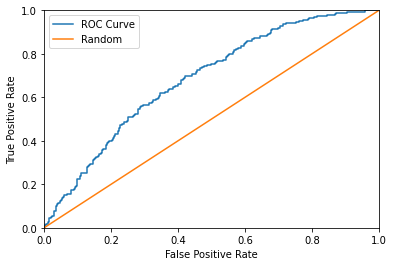

In [11]:
y_pred_score = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_score)
metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label = 'ROC Curve')
plt.plot([0, 1], [0, 1], label = 'Random')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [12]:
auc = roc_auc_score(y_test, y_pred_score)
print(auc)

0.6830830772798423


# B) kNN Recommender

##1) The Application

At scale, this would look like recommending products on Amazon, articles on Medium, movies on
Netflix, or videos on YouTube. Although, we can be certain they all use more efficient means of making
recommendations due to the enormous volume of data they process. However, we could replicate one of
these recommender systems on a smaller scale using what we have learned here in this article. Let us
build the core of a movies recommender system.
**What question are we trying to answer?**
Given a movies data set, what are the 5 most similar movies to a movie query?

##2) Data Source and Contents

In [13]:
knn = pd.read_csv('https://github.com/ArinB/CA05-kNN/raw/master/movies_recommendation_data.csv')
knn.head()

,Movie ID,Movie Name,IMDB Rating,Biography,Drama,Thriller,Comedy,Crime,Mystery,History,Label
0,58,The Imitation Game,8.0,1,1,1,0,0,0,0,0
1,8,Ex Machina,7.7,0,1,0,0,0,1,0,0
2,46,A Beautiful Mind,8.2,1,1,0,0,0,0,0,0
3,62,Good Will Hunting,8.3,0,1,0,0,0,0,0,0
4,97,Forrest Gump,8.8,0,1,0,0,0,0,0,0


##3) Building the Recommendation System

In [0]:
#take out Movie ID and Label column from the data
knn.drop(['Movie ID', 'Label'], axis = 1, inplace = True)
#insert 'The Post' into the data 
knn = knn.append({'Movie Name' : 'The Post', 'IMDB Rating' : 7.2, 'Biography' : 1, 'Drama' : 1, 'Thriller' : 0, 'Comedy' : 0, 'Crime' : 0, 'Mystery' : 0, 'History' : 1}, ignore_index = True)


In [0]:
#make a copy of the data
knn_numeric = knn.copy()
#duplicate will only contain numerical data, thus Movie Name will need to be dropped
knn_numeric.drop(['Movie Name'], axis = 1, inplace = True)

In [0]:
#use NearestNeighbors method and brute algorithm for the kNN
neighbor = NearestNeighbors(n_neighbors=6, algorithm='brute').fit(knn_numeric)

In [17]:
#set indices an integer
distances, indices = neighbor.kneighbors(knn_numeric)
indices.astype(int)
print(indices)

[[ 0 16  2 29 28 27]
 [ 1  6 18 21 10  9]
 [ 2 16 29 27  3 28]
 [ 3 12  4  6 18 21]
 [ 4 12  3 15 17  2]
 [ 5 30  9 10 18 21]
 [ 6 21 18  9 10  3]
 [ 7 20 10  9 18 21]
 [ 8 22 24 14 19 17]
 [ 9 10 18 21  6 19]
 [ 9 10 18 21  6 19]
 [11 18 21  6 10  9]
 [12  4  3  6 17 15]
 [13 23 25  2 24 22]
 [14 19 26  8 22 24]
 [15 17 24 22  8  4]
 [16 29  2  0  6 28]
 [17 15 24 22  8 12]
 [21 18  9 10  6 19]
 [19 14 26  8 22 24]
 [20 26 19  7 14  1]
 [21 18  9 10  6 19]
 [22  8 24 17 14 19]
 [23 25 13 19 26 14]
 [24 22  8 17 15 14]
 [25  8 22 24 14 19]
 [26 19 14  8 22 24]
 [27 28  2 30 16 29]
 [28 27 30  2 16 29]
 [29 16  2 18 21  6]
 [30 28 27 29 16  2]]


In [0]:
#create a function using the kNN algorithm that will return 5 movies that are similar to the movie in the query
def knn_recommender(movie_title=None, movie_id=None):
  if movie_title:
    simulation = knn.loc[knn['Movie Name'] == movie_title].index[0]
    for movie_id in indices[simulation][1:]:
      print(knn.iloc[movie_id]['Movie Name'])

In [19]:
#return 5 recommended movies that are similar to 'The Post'
knn_recommender(movie_title='The Post')

12 Years a Slave
Hacksaw Ridge
Queen of Katwe
The Wind Rises
A Beautiful Mind
